In [1]:
import torch
from load_data import *
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors


In [2]:
# Projector
out_name = "cascade_50"
dataset_name = 'deepmoji'


In [3]:
base_path = "./"
data_path = base_path + f'datasets/{dataset_name}'
output_path = base_path + 'outputs'

device = 'cpu'
# X, Z, Y, _, _, _, X_test, Z_test, Y_test, z_id2label, y_id2label = load_data(dataset_name, None, torch_tensors=True, device=device)
X, Z, Y, _, _, _, X_test, Z_test, Y_test, z_id2label, y_id2label = load_data(dataset_name)

n, input_size = X.shape[0], X.shape[1]



        Stats: 
        - Num samples: 175996
        - train/val/test: 160000/8000/7996
        - proportion per split (z): 
            WH: 0.5/0.5/0.5
            AA: 0.5/0.5/0.5
        - proportion per split (y): 
            neg: 0.5/0.5/0.5
            pos: 0.5/0.5/0.5
        - conditional proportions (y | z):
            neg | WH: 0.5/0.5/0.5
            neg | AA: 0.5/0.5/0.5
            pos | WH: 0.5/0.5/0.5
            pos | AA: 0.5/0.5/0.5
    


In [4]:
# P_path = output_path + f'/eraser_{dataset_name}_{out_name}.pt'
# P = torch.load(P_path, map_location=torch.device('cpu'))['P'].to(device)

P = np.load("./outputs/eraser_deepmoji_" + out_name + ".npy", allow_pickle=True).item().get("P")
P_ = np.load("./outputs/eraser_deepmoji_" + out_name + ".npy", allow_pickle=True).item().get("P_")

# Check that P is an orthogonal projector
print('Idempotence:', np.linalg.norm(P@P - P).item())
print('Symmetry:', np.linalg.norm(P.T - P).item())

# P_ = torch.load(P_path, map_location=torch.device('cpu'))['P_'].to(device)
# Check that P_ is symmetric non-idempotent 
print('Idempotence (approx.):', np.linalg.norm(P_@P_ - P_).item())
print('Symmetry (approx.):', np.linalg.norm(P_.T - P_).item())

# X_ = (X @ P).detach().numpy()
# Z = Z.numpy()



Idempotence: 0.0005213436088524759
Symmetry: 2.8552101412060438e-06
Idempotence (approx.): 0.08649111539125443
Symmetry (approx.): 2.829720187946805e-06


In [5]:
# Réduction de dimension avec tSNE
tSNE = TSNE(n_components=2, random_state=42)
X_tsne= tSNE.fit_transform(X)

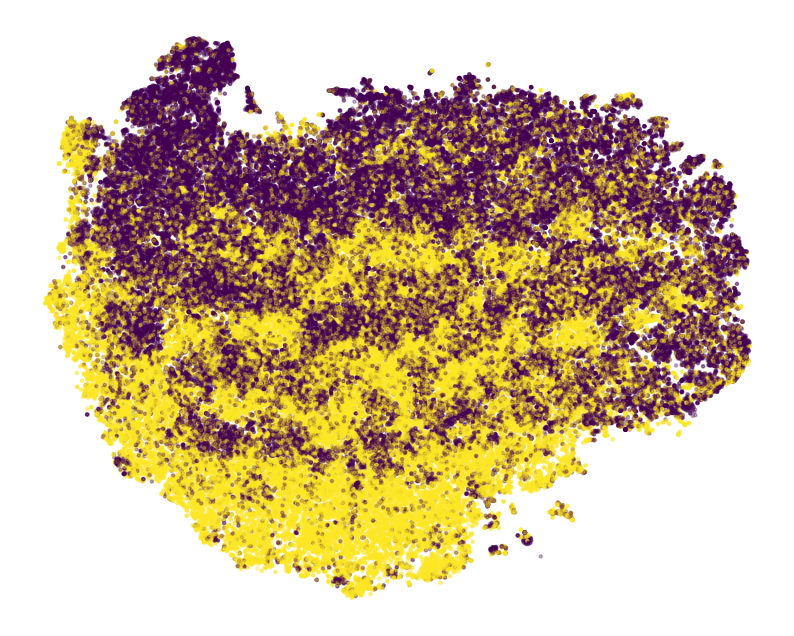

In [6]:
# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Z, cmap='viridis', alpha=0.3, s=5)
plt.axis('off')
plt.show()

In [7]:
# Réduction de dimension avec tSNE
X_ = X @ P
tSNE = TSNE(n_components=2, random_state=42)
X_tsne = tSNE.fit_transform(X_)

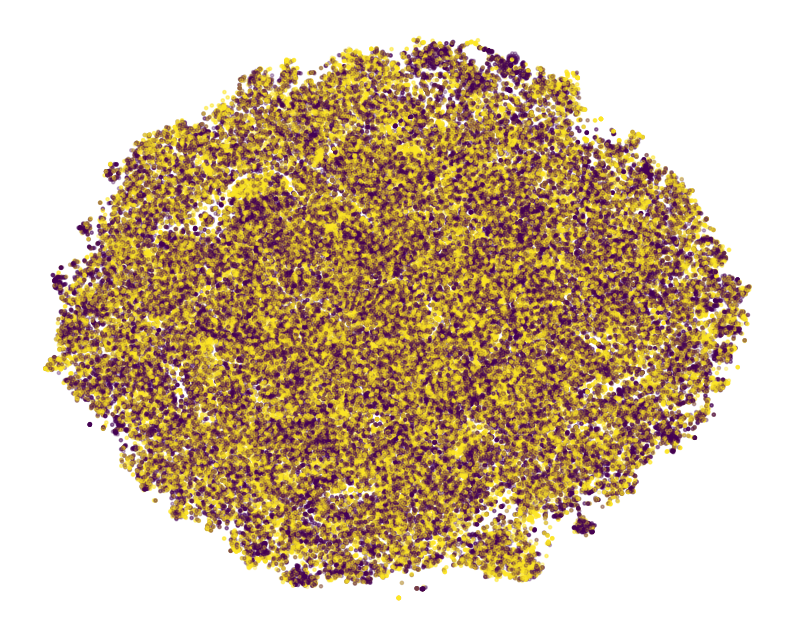

In [8]:
# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Z, cmap='viridis', alpha=0.3, s=5)
plt.axis('off')
plt.show()